In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("steam.csv")
X = data.loc[:,('required_age','positive_ratings','negative_ratings')]
X = pd.get_dummies(X, prefix='required_age', columns=['required_age'])
y = data['english']
print("support english : ", np.unique(y))

support english :  [0 1]


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[ 6.50574099  0.73000595  0.15002801 -0.02016046 -0.0210573  -0.05199523
  -0.08451071 -0.10726932]
 [ 0.12204528  0.09847998  0.15002801 -0.02016046 -0.0210573  -0.05199523
  -0.08451071 -0.10726932]
 [ 0.12720634  0.0436357   0.15002801 -0.02016046 -0.0210573  -0.05199523
  -0.08451071 -0.10726932]
 [ 0.0143478   0.01306294  0.15002801 -0.02016046 -0.0210573  -0.05199523
  -0.08451071 -0.10726932]
 [ 0.22379175  0.01796392  0.15002801 -0.02016046 -0.0210573  -0.05199523
  -0.08451071 -0.10726932]]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[-0.04853278 -0.04691569  0.15002801 -0.02016046 -0.0210573  -0.05199523
  -0.08451071 -0.10726932]
 [-0.05227191 -0.04924949  0.15002801 -0.02016046 -0.0210573  -0.05199523
  -0.08451071 -0.10726932]
 [-0.05248256 -0.04901611  0.15002801 -0.02016046 -0.0210573  -0.05199523
  -0.08451071 -0.10726932]
 [-0.03594613 -0.04154796  0.15002801 -0.02016046 -0.0210573  -0.05199523
  -0.08451071 -0.10726932]
 [-0.01282672 -0.02637826  0.15002801 -0.02016046 -0.0210573  -0.05199523
  -0.08451071 -0.10726932]]
y Training: 10458    1
10644    1
21889    1
17565    1
1965     1
Name: english, dtype: int64


In [5]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=0.1, gamma=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear', random_state=0)

In [6]:
print("Koefisien model : ", clf_svc.coef_)
print("Bias model : ", clf_svc.intercept_)
print("Indeks Support Vector : ", clf_svc.support_)
print("Support vector : ", clf_svc.support_vectors_)
print("Jumlah support vector: ",clf_svc.n_support_)
print("Nilai alpha : ", np.abs(clf_svc.dual_coef_))

Koefisien model :  [[ 1.01304109e-05  5.81984470e-06 -2.22044605e-16  0.00000000e+00
   2.77555756e-17  1.11022302e-16  1.11022302e-16 -2.22044605e-16]]
Bias model :  [0.9999978]
Indeks Support Vector :  [   68   109   220   222   231   247   306   338   398   631   638   660
   662   760   788   845   903   913   915  1065  1079  1155  1174  1257
  1308  1314  1331  1344  1398  1422  1490  1548  1563  1830  1831  1873
  1929  1989  2007  2022  2029  2041  2051  2098  2179  2190  2211  2287
  2302  2316  2393  2432  2448  2481  2497  2532  2638  2717  2745  2806
  2943  2990  3003  3184  3187  3189  3250  3382  3501  3514  3540  3604
  3614  3623  3680  3761  3814  3824  3995  3999  4016  4172  4186  4205
  4275  4390  4421  4557  4652  4676  4689  4706  4917  4942  4984  5023
  5081  5173  5293  5322  5351  5371  5484  5529  5531  5545  5635  5646
  5660  5767  5823  5905  5958  5978  6021  6176  6189  6219  6356  6387
  6494  6497  6546  6658  6691  6724  6794  6980  7088  7176  7247

In [7]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

[1 1 1 ... 1 1 1]


Akurasi : 97.94410931921705 %


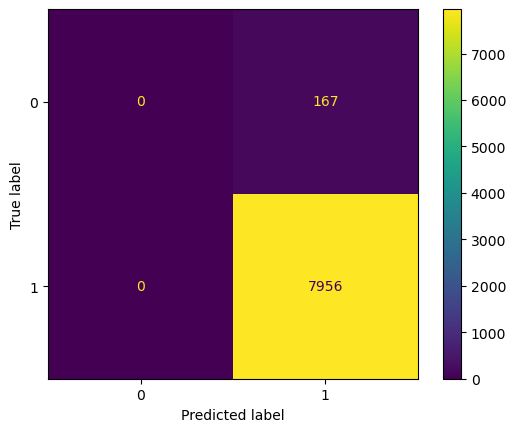

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))